# Theoretical observer

In [1]:
import mne
import numpy as np
import pandas as pd
from scipy.spatial import procrustes
from IPython.core.debugger import set_trace
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform
%run Recon_class.ipynb
%run general_tools.ipynb
%run EEG_auxiliary_module.ipynb
stims = pd.read_csv('C:\\Users\\danne\\Dropbox\\Ilya_study\\Stimuli\\stims.csv')
descr = pd.read_csv('C:\\Users\\danne\\Dropbox\\Ilya_study\\Analysis\\description.csv', index_col = 'Nums') # loading origin desription
dist = pd.DataFrame(squareform(pdist(stims.T)),columns=stims.columns,index=stims.columns)
ims_names, prc_names, _ = import_names()
infolder, outfolder = find_folder()
recon_io = Reconstruction(rc_conf_df=dist, tr_conf_df=dist, ims_df=stims, dims_n=20, image_size=(98,75,3))
recon_io.project_face_space(kind = 'custom').ims2lab().face_reconst(blow='both').lab2ims().distance_test(kind = 'other').add_column_to_summary(descr, 'names')
recon_io.show_face_space(dims=(0,1))
result_io = recon_io.present_summary()
result_io.head()
#result_io.sort_values(by = 'origin').to_clipboard()

C:\Users\danne\Anaconda3\envs\eeg_analysis\lib\site-packages\skimage\color\colorconv.py:1068: UserWarning: Color data out of range: Z < 0 in 3 pixels
  return xyz2rgb(lab2xyz(lab, illuminant, observer))
C:\Users\danne\Anaconda3\envs\eeg_analysis\lib\site-packages\skimage\color\colorconv.py:1068: UserWarning: Color data out of range: Z < 0 in 18 pixels
  return xyz2rgb(lab2xyz(lab, illuminant, observer))
C:\Users\danne\Anaconda3\envs\eeg_analysis\lib\site-packages\skimage\color\colorconv.py:1068: UserWarning: Color data out of range: Z < 0 in 1 pixels
  return xyz2rgb(lab2xyz(lab, illuminant, observer))
C:\Users\danne\Anaconda3\envs\eeg_analysis\lib\site-packages\skimage\color\colorconv.py:1068: UserWarning: Color data out of range: Z < 0 in 5 pixels
  return xyz2rgb(lab2xyz(lab, illuminant, observer))


The overall accuracy is 96.86%


<Figure size 2000x1000 with 2 Axes>

,values,names,acc,origin
0,0.897959,adi,5185.869282,east
1,0.979592,ago,5009.591525,east
2,0.959184,aha,5223.563763,west
3,0.979592,ake,4995.217117,west
4,1.000000,ama,4490.384285,east


# Perception reconstruction

The overall accuracy is 58.04%


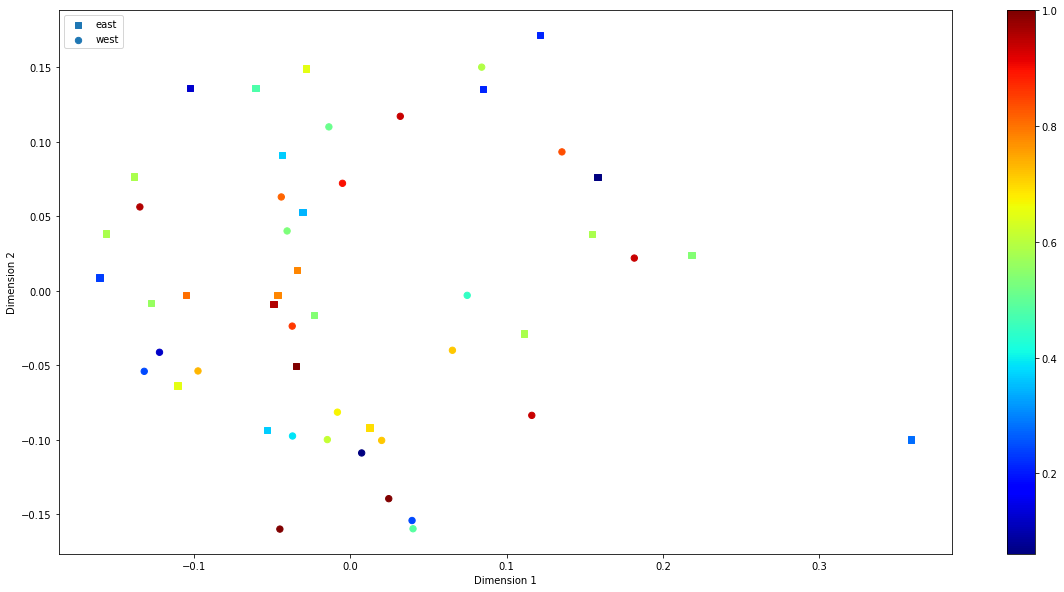

In [4]:
import mne
import numpy as np
import pandas as pd
from scipy.spatial import procrustes
from IPython.core.debugger import set_trace
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform
%run Recon_class.ipynb
%run general_tools.ipynb
%run EEG_auxiliary_module.ipynb
stims = pd.read_csv('C:\\Users\\danne\\Dropbox\\Ilya_study\\Stimuli\\stims.csv')
descr = pd.read_csv('C:\\Users\\danne\\Dropbox\\Ilya_study\\Analysis\\description.csv', index_col = 'Nums') # loading origin desription
ims_names, prc_names, _ = import_names()
infolder, outfolder = find_folder()
data = load_pkl(outfolder, 'svm_prc_accuracy.pkl')
data = np.array(data)
conf_prc_df = pd.DataFrame(data[:,:50,:50].mean(axis=0), index=prc_names, columns=prc_names)



recon_prc = Reconstruction(rc_conf_df=conf_prc_df, tr_conf_df=conf_prc_df, ims_df=stims, dims_n=20, image_size=(98,75,3))
recon_prc.project_face_space(kind = 'custom').ims2lab().face_reconst(blow='both').lab2ims().distance_test()
recon_prc.add_column_to_summary(descr, 'names')
recon_prc.show_face_space(dims=(0,1))
#result_prc.sort_values(by = 'origin').to_clipboard()

# Imagery reconstruction

In [7]:
import mne
import numpy as np
import pandas as pd
from scipy.spatial import procrustes
from IPython.core.debugger import set_trace
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform
%run Recon_class.ipynb
%run general_tools.ipynb
%run EEG_auxiliary_module.ipynb
stims = pd.read_csv('C:\\Users\\danne\\Dropbox\\Ilya_study\\Stimuli\\stims.csv')

ims_names, prc_names, _ = import_names()
infolder, outfolder = find_folder()
data = load_pkl(outfolder, 'svm_img_accuracy.pkl')
data = np.array(data)
conf_img_df = pd.DataFrame(data[5,:,:,:].mean(axis=0), index=ims_names, columns=ims_names)
data = load_pkl(outfolder, 'svm_prc_accuracy.pkl')
data = np.array(data)
conf_prc_df = pd.DataFrame(data[:,:50,:50].mean(axis=0), index=prc_names, columns=prc_names)


recon_img = Reconstruction(rc_conf_df=conf_img_df, tr_conf_df=conf_prc_df, ims_df=stims, dims_n=3, image_size=(98,75,3))
recon_img.project_face_space(kind = 'custom').ims2lab().face_reconst(blow='both').lab2ims().distance_test()
result_img = recon_img.present_summary()
result_img.to_clipboard()

The overall accuracy is 39.18%


# Running by subject

In [24]:
import mne
import numpy as np
import pandas as pd
from scipy.spatial import procrustes
from IPython.core.debugger import set_trace
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform
%run Recon_class.ipynb
%run general_tools.ipynb
%run EEG_auxiliary_module.ipynb
stims = pd.read_csv('C:\\Users\\danne\\Dropbox\\Ilya_study\\Stimuli\\stims.csv')
descr = pd.read_csv('C:\\Users\\danne\\Dropbox\\Ilya_study\\Analysis\\description.csv', index_col = 'Nums') # loading origin desription
ims_names, prc_names, _ = import_names()
infolder, outfolder = find_folder()
data = load_pkl(outfolder, 'svm_prc_accuracy.pkl')
data = np.array(data)
results = []
for i in range(data.shape[0]):
    conf_prc_df = pd.DataFrame(data[i,:50,:50], index=prc_names, columns=prc_names)
    recon_prc = Reconstruction(rc_conf_df=conf_prc_df, tr_conf_df=conf_prc_df, ims_df=stims, dims_n=20, image_size=(98,75,3))
    recon_prc.project_face_space(kind = 'custom').ims2lab().face_reconst(blow='both').lab2ims().distance_test().add_column_to_summary(descr, 'names')
    result = recon_prc.present_summary()
    result['subject'] = i+2
    result['type'] = 'perception'
    result['invterval'] = np.nan
    result['dims'] = 20
    results.append(result)
data_img = load_pkl(outfolder, 'svm_img_accuracy.pkl')
data_img = np.array(data_img)
for j in range(data_img.shape[0]):
    for i in range(data.shape[0]):
        conf_prc_df = pd.DataFrame(data[i,:50,:50], index=prc_names, columns=prc_names)
        conf_img_df = pd.DataFrame(data_img[j,i,:,:], index=ims_names, columns=ims_names)
        recon = Reconstruction(rc_conf_df=conf_img_df, tr_conf_df=conf_prc_df, ims_df=stims, dims_n=3, image_size=(98,75,3))
        recon.project_face_space(kind = 'custom').ims2lab().face_reconst(blow='both').lab2ims().distance_test().add_column_to_summary(descr, 'names')
        result = recon.present_summary()
        result['subject'] = i+2
        result['type'] = 'imagery'
        result['invterval'] = j+1
        result['dims'] = 3
        results.append(result)

results = pd.concat(results)

The overall accuracy is 52.57%
The overall accuracy is 54.49%
The overall accuracy is 53.63%
The overall accuracy is 51.18%
The overall accuracy is 44.41%
The overall accuracy is 52.53%
The overall accuracy is 56.73%
The overall accuracy is 55.92%
The overall accuracy is 48.12%
The overall accuracy is 50.73%
The overall accuracy is 48.41%
The overall accuracy is 46.86%
The overall accuracy is 47.31%
The overall accuracy is 57.71%
The overall accuracy is 48.98%
The overall accuracy is 63.71%
The overall accuracy is 49.92%
The overall accuracy is 42.86%
The overall accuracy is 52.24%
The overall accuracy is 28.16%
The overall accuracy is 49.80%
The overall accuracy is 59.59%
The overall accuracy is 40.82%
The overall accuracy is 37.96%
The overall accuracy is 45.71%
The overall accuracy is 58.37%
The overall accuracy is 38.37%
The overall accuracy is 46.94%
The overall accuracy is 22.04%
The overall accuracy is 37.14%
The overall accuracy is 37.14%
The overall accuracy is 45.31%
The over

In [25]:
results.to_clipboard()

In [26]:
results.groupby(['origin','type']).mean()

values       acc  subject  invterval  dims
origin type                                                    
east   imagery          NaN       NaN       10        3.5     3
       perception  0.499736  0.562732       10        NaN    20
west   imagery     0.451741  0.547835       10        3.5     3
       perception  0.539352  0.551480       10        NaN    20

## Subject 02

In [9]:
stims = pd.read_csv('C:\\Users\\danne\\Dropbox\\Ilya_study\\Stimuli\\stims.csv')
descr = pd.read_csv('C:\\Users\\danne\\Dropbox\\Ilya_study\\Analysis\\description.csv', index_col = 'Nums') # loading origin desription
ims_names, prc_names, _ = import_names()
infolder, outfolder = find_folder()
data = load_pkl(outfolder, 'svm_prc_accuracy.pkl')
data = np.array(data)
conf_prc_df = pd.DataFrame(data[0,:50,:50], index=prc_names, columns=prc_names)



recon_prc = Reconstruction(rc_conf_df=conf_prc_df, tr_conf_df=conf_prc_df, ims_df=stims, dims_n=20, image_size=(98,75,3))
recon_prc.project_face_space(kind = 'custom').ims2lab().face_reconst(blow='both').lab2ims().distance_test()
out = recon_prc.add_column_to_summary(descr, 'names')


The overall accuracy is 52.57%


# Subject 03

In [10]:
stims = pd.read_csv('C:\\Users\\danne\\Dropbox\\Ilya_study\\Stimuli\\stims.csv')
descr = pd.read_csv('C:\\Users\\danne\\Dropbox\\Ilya_study\\Analysis\\description.csv', index_col = 'Nums') # loading origin desription
ims_names, prc_names, _ = import_names()
infolder, outfolder = find_folder()
data = load_pkl(outfolder, 'svm_prc_accuracy.pkl')
data = np.array(data)
conf_prc_df = pd.DataFrame(data[1,:50,:50], index=prc_names, columns=prc_names)



recon_prc = Reconstruction(rc_conf_df=conf_prc_df, tr_conf_df=conf_prc_df, ims_df=stims, dims_n=20, image_size=(98,75,3))
recon_prc.project_face_space(kind = 'custom').ims2lab().face_reconst(blow='both').lab2ims().distance_test()
out = recon_prc.add_column_to_summary(descr, 'names')

The overall accuracy is 54.49%


# Subject 04

In [11]:
stims = pd.read_csv('C:\\Users\\danne\\Dropbox\\Ilya_study\\Stimuli\\stims.csv')
descr = pd.read_csv('C:\\Users\\danne\\Dropbox\\Ilya_study\\Analysis\\description.csv', index_col = 'Nums') # loading origin desription
ims_names, prc_names, _ = import_names()
infolder, outfolder = find_folder()
data = load_pkl(outfolder, 'svm_prc_accuracy.pkl')
data = np.array(data)
conf_prc_df = pd.DataFrame(data[2,:50,:50], index=prc_names, columns=prc_names)



recon_prc = Reconstruction(rc_conf_df=conf_prc_df, tr_conf_df=conf_prc_df, ims_df=stims, dims_n=20, image_size=(98,75,3))
recon_prc.project_face_space(kind = 'custom').ims2lab().face_reconst(blow='both').lab2ims().distance_test()
out = recon_prc.add_column_to_summary(descr, 'names')

C:\Users\danne\Anaconda3\envs\eeg_analysis\lib\site-packages\skimage\color\colorconv.py:1068: UserWarning: Color data out of range: Z < 0 in 16 pixels
  return xyz2rgb(lab2xyz(lab, illuminant, observer))
C:\Users\danne\Anaconda3\envs\eeg_analysis\lib\site-packages\skimage\color\colorconv.py:1068: UserWarning: Color data out of range: Z < 0 in 22 pixels
  return xyz2rgb(lab2xyz(lab, illuminant, observer))
C:\Users\danne\Anaconda3\envs\eeg_analysis\lib\site-packages\skimage\color\colorconv.py:1068: UserWarning: Color data out of range: Z < 0 in 14 pixels
  return xyz2rgb(lab2xyz(lab, illuminant, observer))
C:\Users\danne\Anaconda3\envs\eeg_analysis\lib\site-packages\skimage\color\colorconv.py:1068: UserWarning: Color data out of range: Z < 0 in 19 pixels
  return xyz2rgb(lab2xyz(lab, illuminant, observer))
C:\Users\danne\Anaconda3\envs\eeg_analysis\lib\site-packages\skimage\color\colorconv.py:1068: UserWarning: Color data out of range: Z < 0 in 10 pixels
  return xyz2rgb(lab2xyz(lab, ill

The overall accuracy is 53.63%


# Subject 05

In [12]:
stims = pd.read_csv('C:\\Users\\danne\\Dropbox\\Ilya_study\\Stimuli\\stims.csv')
descr = pd.read_csv('C:\\Users\\danne\\Dropbox\\Ilya_study\\Analysis\\description.csv', index_col = 'Nums') # loading origin desription
ims_names, prc_names, _ = import_names()
infolder, outfolder = find_folder()
data = load_pkl(outfolder, 'svm_prc_accuracy.pkl')
data = np.array(data)
conf_prc_df = pd.DataFrame(data[3,:50,:50], index=prc_names, columns=prc_names)



recon_prc = Reconstruction(rc_conf_df=conf_prc_df, tr_conf_df=conf_prc_df, ims_df=stims, dims_n=20, image_size=(98,75,3))
recon_prc.project_face_space(kind = 'custom').ims2lab().face_reconst(blow='both').lab2ims().distance_test()
out = recon_prc.add_column_to_summary(descr, 'names')

The overall accuracy is 51.18%


# Subject 06

In [13]:
stims = pd.read_csv('C:\\Users\\danne\\Dropbox\\Ilya_study\\Stimuli\\stims.csv')
descr = pd.read_csv('C:\\Users\\danne\\Dropbox\\Ilya_study\\Analysis\\description.csv', index_col = 'Nums') # loading origin desription
ims_names, prc_names, _ = import_names()
infolder, outfolder = find_folder()
data = load_pkl(outfolder, 'svm_prc_accuracy.pkl')
data = np.array(data)
conf_prc_df = pd.DataFrame(data[4,:50,:50], index=prc_names, columns=prc_names)



recon_prc = Reconstruction(rc_conf_df=conf_prc_df, tr_conf_df=conf_prc_df, ims_df=stims, dims_n=20, image_size=(98,75,3))
recon_prc.project_face_space(kind = 'custom').ims2lab().face_reconst(blow='both').lab2ims().distance_test()
out = recon_prc.add_column_to_summary(descr, 'names')

The overall accuracy is 44.41%


# Subject 07

In [14]:
stims = pd.read_csv('C:\\Users\\danne\\Dropbox\\Ilya_study\\Stimuli\\stims.csv')
descr = pd.read_csv('C:\\Users\\danne\\Dropbox\\Ilya_study\\Analysis\\description.csv', index_col = 'Nums') # loading origin desription
ims_names, prc_names, _ = import_names()
infolder, outfolder = find_folder()
data = load_pkl(outfolder, 'svm_prc_accuracy.pkl')
data = np.array(data)
conf_prc_df = pd.DataFrame(data[5,:50,:50], index=prc_names, columns=prc_names)



recon_prc = Reconstruction(rc_conf_df=conf_prc_df, tr_conf_df=conf_prc_df, ims_df=stims, dims_n=20, image_size=(98,75,3))
recon_prc.project_face_space(kind = 'custom').ims2lab().face_reconst(blow='both').lab2ims().distance_test()
out = recon_prc.add_column_to_summary(descr, 'names')

C:\Users\danne\Anaconda3\envs\eeg_analysis\lib\site-packages\skimage\color\colorconv.py:1068: UserWarning: Color data out of range: Z < 0 in 21 pixels
  return xyz2rgb(lab2xyz(lab, illuminant, observer))


The overall accuracy is 52.53%


# Subject 08

In [15]:
stims = pd.read_csv('C:\\Users\\danne\\Dropbox\\Ilya_study\\Stimuli\\stims.csv')
descr = pd.read_csv('C:\\Users\\danne\\Dropbox\\Ilya_study\\Analysis\\description.csv', index_col = 'Nums') # loading origin desription
ims_names, prc_names, _ = import_names()
infolder, outfolder = find_folder()
data = load_pkl(outfolder, 'svm_prc_accuracy.pkl')
data = np.array(data)
conf_prc_df = pd.DataFrame(data[6,:50,:50], index=prc_names, columns=prc_names)



recon_prc = Reconstruction(rc_conf_df=conf_prc_df, tr_conf_df=conf_prc_df, ims_df=stims, dims_n=20, image_size=(98,75,3))
recon_prc.project_face_space(kind = 'custom').ims2lab().face_reconst(blow='both').lab2ims().distance_test()
out = recon_prc.add_column_to_summary(descr, 'names')

The overall accuracy is 56.73%


# Subject 09

In [16]:
stims = pd.read_csv('C:\\Users\\danne\\Dropbox\\Ilya_study\\Stimuli\\stims.csv')
descr = pd.read_csv('C:\\Users\\danne\\Dropbox\\Ilya_study\\Analysis\\description.csv', index_col = 'Nums') # loading origin desription
ims_names, prc_names, _ = import_names()
infolder, outfolder = find_folder()
data = load_pkl(outfolder, 'svm_prc_accuracy.pkl')
data = np.array(data)
conf_prc_df = pd.DataFrame(data[7,:50,:50], index=prc_names, columns=prc_names)



recon_prc = Reconstruction(rc_conf_df=conf_prc_df, tr_conf_df=conf_prc_df, ims_df=stims, dims_n=20, image_size=(98,75,3))
recon_prc.project_face_space(kind = 'custom').ims2lab().face_reconst(blow='both').lab2ims().distance_test()
out = recon_prc.add_column_to_summary(descr, 'names')

C:\Users\danne\Anaconda3\envs\eeg_analysis\lib\site-packages\skimage\color\colorconv.py:1068: UserWarning: Color data out of range: Z < 0 in 39 pixels
  return xyz2rgb(lab2xyz(lab, illuminant, observer))


The overall accuracy is 55.92%


# Subject 10

In [17]:
stims = pd.read_csv('C:\\Users\\danne\\Dropbox\\Ilya_study\\Stimuli\\stims.csv')
descr = pd.read_csv('C:\\Users\\danne\\Dropbox\\Ilya_study\\Analysis\\description.csv', index_col = 'Nums') # loading origin desription
ims_names, prc_names, _ = import_names()
infolder, outfolder = find_folder()
data = load_pkl(outfolder, 'svm_prc_accuracy.pkl')
data = np.array(data)
conf_prc_df = pd.DataFrame(data[8,:50,:50], index=prc_names, columns=prc_names)



recon_prc = Reconstruction(rc_conf_df=conf_prc_df, tr_conf_df=conf_prc_df, ims_df=stims, dims_n=20, image_size=(98,75,3))
recon_prc.project_face_space(kind = 'custom').ims2lab().face_reconst(blow='both').lab2ims().distance_test()
out = recon_prc.add_column_to_summary(descr, 'names')

The overall accuracy is 48.12%


# Subject 11

In [18]:
stims = pd.read_csv('C:\\Users\\danne\\Dropbox\\Ilya_study\\Stimuli\\stims.csv')
descr = pd.read_csv('C:\\Users\\danne\\Dropbox\\Ilya_study\\Analysis\\description.csv', index_col = 'Nums') # loading origin desription
ims_names, prc_names, _ = import_names()
infolder, outfolder = find_folder()
data = load_pkl(outfolder, 'svm_prc_accuracy.pkl')
data = np.array(data)
conf_prc_df = pd.DataFrame(data[9,:50,:50], index=prc_names, columns=prc_names)



recon_prc = Reconstruction(rc_conf_df=conf_prc_df, tr_conf_df=conf_prc_df, ims_df=stims, dims_n=20, image_size=(98,75,3))
recon_prc.project_face_space(kind = 'custom').ims2lab().face_reconst(blow='both').lab2ims().distance_test()
out = recon_prc.add_column_to_summary(descr, 'names')

C:\Users\danne\Anaconda3\envs\eeg_analysis\lib\site-packages\skimage\color\colorconv.py:1068: UserWarning: Color data out of range: Z < 0 in 32 pixels
  return xyz2rgb(lab2xyz(lab, illuminant, observer))


The overall accuracy is 50.73%


# Subject 12

In [19]:
stims = pd.read_csv('C:\\Users\\danne\\Dropbox\\Ilya_study\\Stimuli\\stims.csv')
descr = pd.read_csv('C:\\Users\\danne\\Dropbox\\Ilya_study\\Analysis\\description.csv', index_col = 'Nums') # loading origin desription
ims_names, prc_names, _ = import_names()
infolder, outfolder = find_folder()
data = load_pkl(outfolder, 'svm_prc_accuracy.pkl')
data = np.array(data)
conf_prc_df = pd.DataFrame(data[10,:50,:50], index=prc_names, columns=prc_names)



recon_prc = Reconstruction(rc_conf_df=conf_prc_df, tr_conf_df=conf_prc_df, ims_df=stims, dims_n=20, image_size=(98,75,3))
recon_prc.project_face_space(kind = 'custom').ims2lab().face_reconst(blow='both').lab2ims().distance_test()
out = recon_prc.add_column_to_summary(descr, 'names')

The overall accuracy is 48.41%


# Subject 13

In [20]:
stims = pd.read_csv('C:\\Users\\danne\\Dropbox\\Ilya_study\\Stimuli\\stims.csv')
descr = pd.read_csv('C:\\Users\\danne\\Dropbox\\Ilya_study\\Analysis\\description.csv', index_col = 'Nums') # loading origin desription
ims_names, prc_names, _ = import_names()
infolder, outfolder = find_folder()
data = load_pkl(outfolder, 'svm_prc_accuracy.pkl')
data = np.array(data)
conf_prc_df = pd.DataFrame(data[11,:50,:50], index=prc_names, columns=prc_names)



recon_prc = Reconstruction(rc_conf_df=conf_prc_df, tr_conf_df=conf_prc_df, ims_df=stims, dims_n=20, image_size=(98,75,3))
recon_prc.project_face_space(kind = 'custom').ims2lab().face_reconst(blow='both').lab2ims().distance_test()
out = recon_prc.add_column_to_summary(descr, 'names')

The overall accuracy is 46.86%


# Subject 14

In [21]:
stims = pd.read_csv('C:\\Users\\danne\\Dropbox\\Ilya_study\\Stimuli\\stims.csv')
descr = pd.read_csv('C:\\Users\\danne\\Dropbox\\Ilya_study\\Analysis\\description.csv', index_col = 'Nums') # loading origin desription
ims_names, prc_names, _ = import_names()
infolder, outfolder = find_folder()
data = load_pkl(outfolder, 'svm_prc_accuracy.pkl')
data = np.array(data)
conf_prc_df = pd.DataFrame(data[12,:50,:50], index=prc_names, columns=prc_names)



recon_prc = Reconstruction(rc_conf_df=conf_prc_df, tr_conf_df=conf_prc_df, ims_df=stims, dims_n=20, image_size=(98,75,3))
recon_prc.project_face_space(kind = 'custom').ims2lab().face_reconst(blow='both').lab2ims().distance_test()
out = recon_prc.add_column_to_summary(descr, 'names')

C:\Users\danne\Anaconda3\envs\eeg_analysis\lib\site-packages\skimage\color\colorconv.py:1068: UserWarning: Color data out of range: Z < 0 in 23 pixels
  return xyz2rgb(lab2xyz(lab, illuminant, observer))
C:\Users\danne\Anaconda3\envs\eeg_analysis\lib\site-packages\skimage\color\colorconv.py:1068: UserWarning: Color data out of range: Z < 0 in 20 pixels
  return xyz2rgb(lab2xyz(lab, illuminant, observer))


The overall accuracy is 47.31%


# Subject 15

In [22]:
stims = pd.read_csv('C:\\Users\\danne\\Dropbox\\Ilya_study\\Stimuli\\stims.csv')
descr = pd.read_csv('C:\\Users\\danne\\Dropbox\\Ilya_study\\Analysis\\description.csv', index_col = 'Nums') # loading origin desription
ims_names, prc_names, _ = import_names()
infolder, outfolder = find_folder()
data = load_pkl(outfolder, 'svm_prc_accuracy.pkl')
data = np.array(data)
conf_prc_df = pd.DataFrame(data[13,:50,:50], index=prc_names, columns=prc_names)



recon_prc = Reconstruction(rc_conf_df=conf_prc_df, tr_conf_df=conf_prc_df, ims_df=stims, dims_n=20, image_size=(98,75,3))
recon_prc.project_face_space(kind = 'custom').ims2lab().face_reconst(blow='both').lab2ims().distance_test()
out = recon_prc.add_column_to_summary(descr, 'names')

The overall accuracy is 57.71%


# Subject 16

In [23]:
stims = pd.read_csv('C:\\Users\\danne\\Dropbox\\Ilya_study\\Stimuli\\stims.csv')
descr = pd.read_csv('C:\\Users\\danne\\Dropbox\\Ilya_study\\Analysis\\description.csv', index_col = 'Nums') # loading origin desription
ims_names, prc_names, _ = import_names()
infolder, outfolder = find_folder()
data = load_pkl(outfolder, 'svm_prc_accuracy.pkl')
data = np.array(data)
conf_prc_df = pd.DataFrame(data[14,:50,:50], index=prc_names, columns=prc_names)



recon_prc = Reconstruction(rc_conf_df=conf_prc_df, tr_conf_df=conf_prc_df, ims_df=stims, dims_n=20, image_size=(98,75,3))
recon_prc.project_face_space(kind = 'custom').ims2lab().face_reconst(blow='both').lab2ims().distance_test()
out = recon_prc.add_column_to_summary(descr, 'names')

C:\Users\danne\Anaconda3\envs\eeg_analysis\lib\site-packages\skimage\color\colorconv.py:1068: UserWarning: Color data out of range: Z < 0 in 15 pixels
  return xyz2rgb(lab2xyz(lab, illuminant, observer))


The overall accuracy is 48.98%


# Subject 17

In [24]:
stims = pd.read_csv('C:\\Users\\danne\\Dropbox\\Ilya_study\\Stimuli\\stims.csv')
descr = pd.read_csv('C:\\Users\\danne\\Dropbox\\Ilya_study\\Analysis\\description.csv', index_col = 'Nums') # loading origin desription
ims_names, prc_names, _ = import_names()
infolder, outfolder = find_folder()
data = load_pkl(outfolder, 'svm_prc_accuracy.pkl')
data = np.array(data)
conf_prc_df = pd.DataFrame(data[15,:50,:50], index=prc_names, columns=prc_names)



recon_prc = Reconstruction(rc_conf_df=conf_prc_df, tr_conf_df=conf_prc_df, ims_df=stims, dims_n=20, image_size=(98,75,3))
recon_prc.project_face_space(kind = 'custom').ims2lab().face_reconst(blow='both').lab2ims().distance_test()
out = recon_prc.add_column_to_summary(descr, 'names')

C:\Users\danne\Anaconda3\envs\eeg_analysis\lib\site-packages\skimage\color\colorconv.py:1068: UserWarning: Color data out of range: Z < 0 in 34 pixels
  return xyz2rgb(lab2xyz(lab, illuminant, observer))
C:\Users\danne\Anaconda3\envs\eeg_analysis\lib\site-packages\skimage\color\colorconv.py:1068: UserWarning: Color data out of range: Z < 0 in 17 pixels
  return xyz2rgb(lab2xyz(lab, illuminant, observer))


The overall accuracy is 63.71%


# Subject 18

In [25]:
stims = pd.read_csv('C:\\Users\\danne\\Dropbox\\Ilya_study\\Stimuli\\stims.csv')
descr = pd.read_csv('C:\\Users\\danne\\Dropbox\\Ilya_study\\Analysis\\description.csv', index_col = 'Nums') # loading origin desription
ims_names, prc_names, _ = import_names()
infolder, outfolder = find_folder()
data = load_pkl(outfolder, 'svm_prc_accuracy.pkl')
data = np.array(data)
conf_prc_df = pd.DataFrame(data[16,:50,:50], index=prc_names, columns=prc_names)



recon_prc = Reconstruction(rc_conf_df=conf_prc_df, tr_conf_df=conf_prc_df, ims_df=stims, dims_n=20, image_size=(98,75,3))
recon_prc.project_face_space(kind = 'custom').ims2lab().face_reconst(blow='both').lab2ims().distance_test()
out = recon_prc.add_column_to_summary(descr, 'names')

The overall accuracy is 49.92%
